**Código-exemplo para disciplina de Deep Learning

Março/2023


Professor: Sérgio Canuto



In [32]:
import tensorflow as tf
from tensorflow import keras


In [33]:
tf.__version__

'2.15.0'

**Compatibilidade com a versão 1 do tensorflow: Habilita recursos do tensorboard**




In [34]:
#tf.compat.v1.disable_v2_behavior()


fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [35]:
from sklearn.utils import resample
X_train_full, y_train_full = resample(X_train_full, y_train_full, n_samples=10000, random_state=0)

print (X_train_full.shape, X_train_full.dtype)

(10000, 28, 28) uint8


In [36]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.
print(X_train.shape)

(5000, 28, 28)


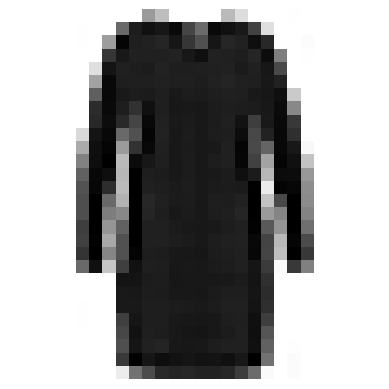

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [38]:
y_train

array([3, 4, 0, ..., 7, 3, 6], dtype=uint8)

In [39]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [40]:
class_names[y_train[0]]

'Dress'

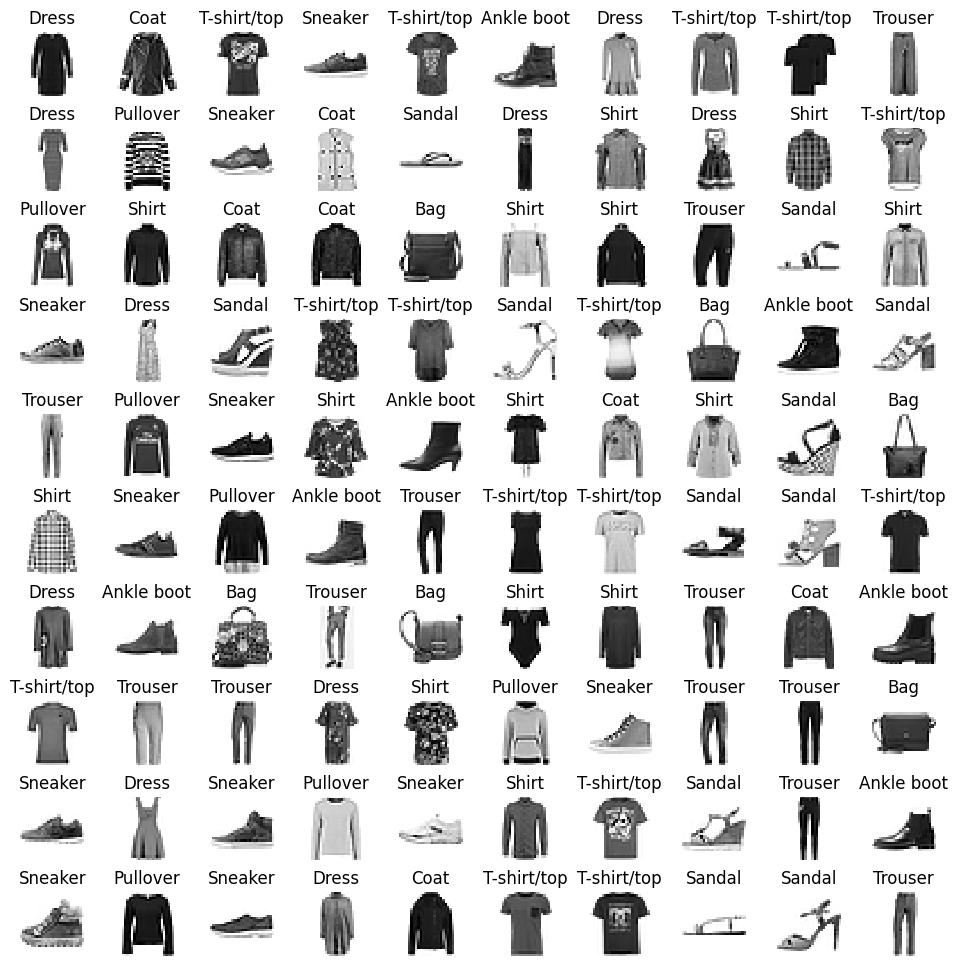

In [41]:
n_rows=10
n_cols=10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range (n_cols):
        index=n_cols*row+col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=Flase)
plt.show()


In [42]:
tf.compat.v1.reset_default_graph() #reseta o modelo
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [43]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


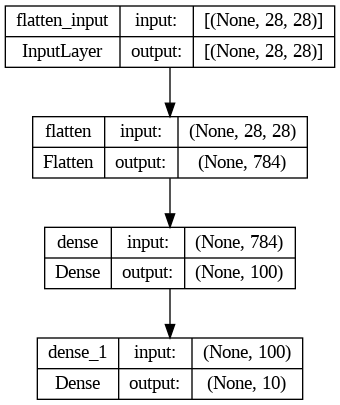

In [44]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [45]:
model.layers

In [46]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [47]:
weights,biases=hidden1.get_weights()

In [48]:
print("Olá, eu sou o conhecimento: ", weights)

Olá, eu sou o conhecimento:  [[ 0.01942968 -0.06970897 -0.05621844 ...  0.03633948  0.05909245
  -0.01438767]
 [ 0.02389406  0.05005591 -0.04358599 ...  0.04031971  0.00740785
  -0.01105002]
 [-0.04453394  0.02281465  0.00780482 ... -0.01386926 -0.04713376
  -0.07913986]
 ...
 [ 0.04603468  0.0591923  -0.06660868 ... -0.01780093 -0.01911457
   0.0077633 ]
 [-0.04756789 -0.00850567 -0.00158393 ...  0.0817226   0.08022957
  -0.06964206]
 [-0.04844788 -0.03619913  0.05084831 ... -0.08039248 -0.04001921
   0.00341073]]


In [49]:
biases


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [50]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [51]:
# Antes do aprendizado, inicializa as variáveis para visualização pelo tensorboard
#e aprende o modelo
history=model.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid), batch_size=30)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
4590/5000 [==========================>...] - ETA: 0s - loss: 2.1160 - acc: 0.3810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5000/5000 [==============================] - 1s 105us/sample - loss: 2.1026 - acc: 0.3978 - val_loss: 1.9369 - val_acc: 0.5566
Epoch 2/10
5000/5000 [==============================] - 1s 101us/sample - loss: 1.8030 - acc: 0.5806 - val_loss: 1.6890 - val_acc: 0.6196
Epoch 3/10
5000/5000 [==============================] - 0s 95us/sample - loss: 1.5811 - acc: 0.6420 - val_loss: 1.4957 - val_acc: 0.6550
Epoch 4/10
5000/5000 [==============================] - 0s 96us/sample - loss: 1.4115 - acc: 0.6694 - val_loss: 1.3479 - val_acc: 0.6850
Epoch 5/10
5000/5000 [==============================] - 0s 93us/sample - loss: 1.2817 - acc: 0.6912 - val_loss: 1.2373 - val_acc: 0.7056
Epoch 6/10
5000/5000 [==============================] - 0s 97us/sample - loss: 1.1818 - acc: 0.7084 - val_loss: 1.1474 - val_acc: 0.7180
Epoch 7/10
5000/5000 [==============================] - 1s 113us/sample - loss: 1.1023 - acc: 0.7136 - val_loss: 1.0794 - val_acc: 0.7112
Epoch 8/10
5000/5000 [===========================

In [52]:
#treina mais 10  épocas do modelo...
history=model.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid), batch_size=30)

Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 109us/sample - loss: 0.9073 - acc: 0.7372 - val_loss: 0.9033 - val_acc: 0.7370
Epoch 2/10
5000/5000 [==============================] - 0s 93us/sample - loss: 0.8764 - acc: 0.7412 - val_loss: 0.8748 - val_acc: 0.7406
Epoch 3/10
5000/5000 [==============================] - 1s 101us/sample - loss: 0.8496 - acc: 0.7440 - val_loss: 0.8500 - val_acc: 0.7434
Epoch 4/10
5000/5000 [==============================] - 0s 97us/sample - loss: 0.8258 - acc: 0.7480 - val_loss: 0.8288 - val_acc: 0.7454
Epoch 5/10
5000/5000 [==============================] - 0s 98us/sample - loss: 0.8052 - acc: 0.7494 - val_loss: 0.8090 - val_acc: 0.7478
Epoch 6/10
5000/5000 [==============================] - 0s 95us/sample - loss: 0.7869 - acc: 0.7522 - val_loss: 0.7928 - val_acc: 0.7480
Epoch 7/10
5000/5000 [==============================] - 0s 99us/sample - loss: 0.7708 - acc: 0.7564 - val_loss: 0.7778 - val_acc

In [53]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

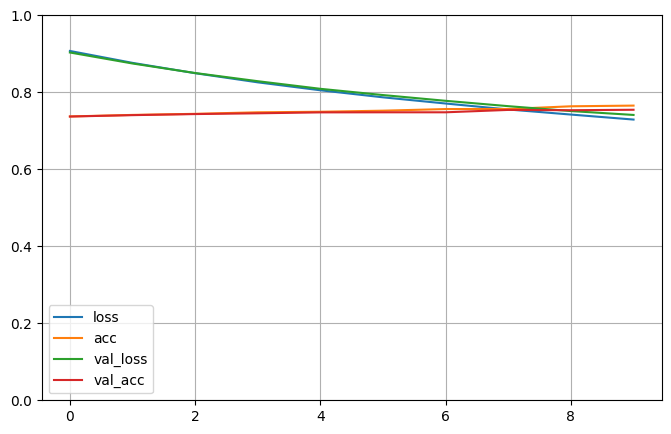

In [54]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
model.evaluate(X_test,y_test)

[0.7442769032478332, 0.7542]

In [56]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.16, 0.05, 0.45],
       [0.01, 0.  , 0.54, 0.  , 0.18, 0.  , 0.25, 0.  , 0.01, 0.  ],
       [0.01, 0.97, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [57]:
import  numpy as np
predict_aux=model.predict(X_new)
y_pred=np.argmax(predict_aux,axis=1)
y_pred


array([9, 2, 1])

In [58]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

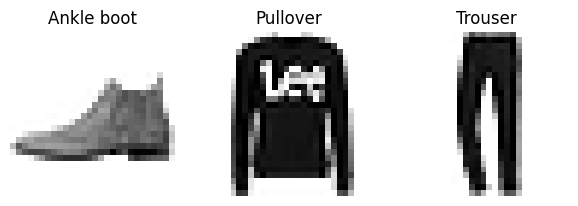

In [59]:
y_new=y_test[:3]
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate(X_new):
    plt.subplot(1,3, index+1)
    plt.imshow(image,cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
